# REDA1-CE1003: Executive Education



## Data Analytics and Visualization



### Summer 2021

## Week 1: Introduction to Data Analytics



### Demystifying the Unmystical



### Like a hammer and nails, this class is about ideas and the tools to implement them



### The ideas do not change, but the tools to impliment them do

## Course Introduction and Overview

* Who I am: https://www.sps.nyu.edu/homepage/academics/faculty-directory/20319-timothy-h-savage.html
    * Clinicial Professor at the NYU Schack Institute of Real Estate
    * Faculty Director of the CREFC Center for Real Estate Finance
    * Distinquished Fellow of the NAIOP Research Foundation
    * Mentor at the Real Estate Research Institute
    * Former Senior Managing Economist and Principal Data Scientist of CBRE Econometric Advisors
    * Former visiting scholar at the NYU Center for Urban Science & Progress (CUSP)
* What matters
    * Econometrician by training
    * Bayesian by practice, but classical statistician when teaching

## Some Perspective
* Like every other major industry, CRE will be disrupted by the application of technology empowered by data analytics. 



* It will be called different things, but it is the same thing.
    * Econometrics and forecasting
    * Statistical learning
    * Machine learning



* Why?  **Examples**
    * I want to predict what the 10-Year U.S. Treasury is going to be in the future to determine a realistic DCF for my property.
    * I want to predict what the cap rate on this property is, based on its characteristics.
    * I want to predict how likely my current tenant is to churn at the end of her lease term.  (And whether I can intervene to affect the decision.)
    * Given the current interest rate environment, demand for hard assets like CRE is strong.  Algorithmic deployment of capital.  
            
            
            
* The same thing happened with **bond and equity trading**.

## Our Primary Goals
* Develop a common language among us through rapid immersion.
    * Explore conjectures about the world.
    * Time series as storytelling and for forecasting.
    * Some considerations about causation.
 


* Provide you with many examples from a variety of sources, including real estate and finance.




* Data analysis is a contact sport.




* Never forget: **If I can do this, so can you.  And you'll be better RE professionals.**

## Very Useful Resources




* Anacdona (for Python and Jupyter Notebooks): https://www.anaconda.com/




* My github repository: https://github.com/thsavage



* Stacked Overflow: https://stackoverflow.com/



* Federal Reserve Economic Database (FRED): https://fred.stlouisfed.org



* Real Capital Analytics (RCA): https://www.rcanalytics.com/

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## The Current U.S. Economic Cycle: The Power and Limitation of Data Analytics

### Three Critical Empirical Regularities

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
balance_sheet = fred.get_series("WALCL", observation_start='2000-01-01')

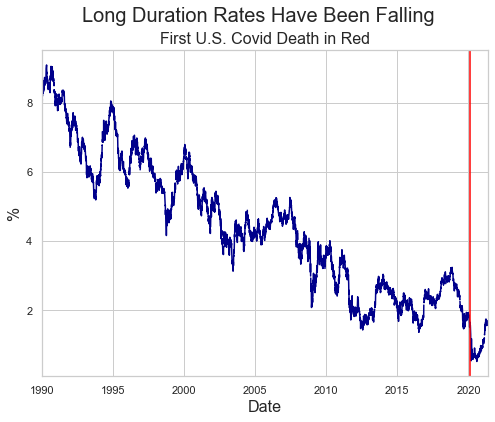

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 2, 6), color="red")

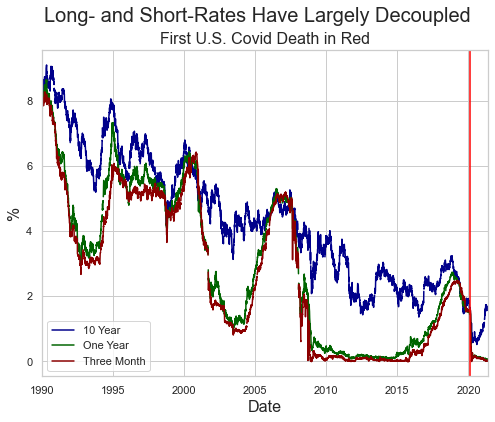

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 2, 6), color="red")

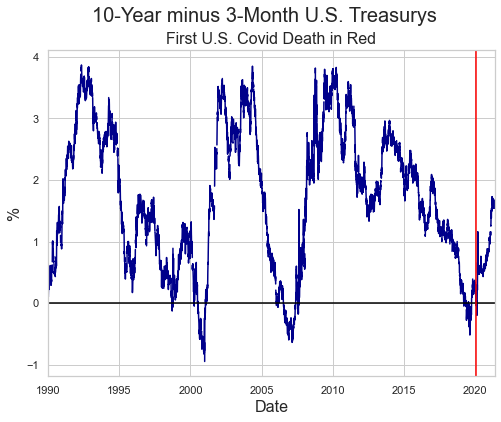

In [5]:
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year minus 3-Month U.S. Treasurys', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2020, 2, 6), color="red")

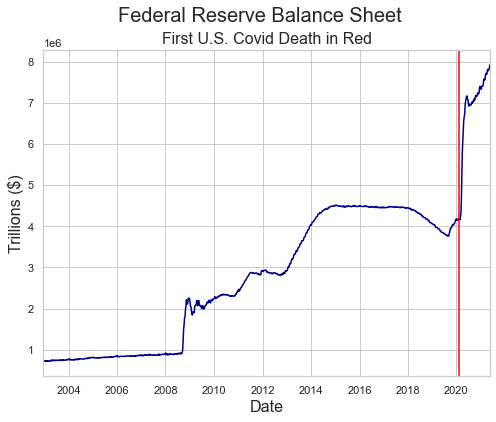

In [6]:
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Balance Sheet', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions ($)', fontsize=16)
plt.axvline(dt.datetime(2020, 2, 6), color="red")

### Economic Implications: The U.S. Economy Was Not on Sound Footing in 2019
* Healthy economies do not have negative yield curves.



* Healthy economies do not require Fed intervention in overnight lending marekts.

### Prominent CRE Brokerage Forecast for 2020 (in December 2019)
* Fed Funds target rate of 1.25% or 125 basis points (bps).



* "Good, not great" output growth.



* Slight decline in capitalization rates $\implies$ slightly higher real estate values.



* This forecast **has disappeared from the brokerage website**.

### Concurrent Forecast Errors
* FOMC had already lowered its target rate by 40% to 1.5% during 2019.
    * Inconsistent with a forecast of 1.25%.



* Long-term interest rates fell substantially during 2019 with the 10-year U.S. Treasury declining by 30%.
    * Reflecting slowing output growth.



* Yield curve (10-year minus 3-month) was below 50 bps and had been falling since 2017.
    * It was negative for substantial portions of 2019: Professor Campbell Harvey's recession predictor.



* In other words, **the predictions were not consistent with the economic data at the time the predictions were made**.
    * Live by the forecast, **die by the forecast error**.  

### A Better Example of the Power of Data Analytics: Cap Rate Modeling

### Implications for Cap Rates During the Pandemic
* Transactions were sparse.



* But consider, Treasurys plunged, putting **downward pressure** on cap rates.



* Fed's balance sheet expanded considerably, putting **downward pressure** on cap rates.



* As we think about the value of space, the important question is **what happened to NOI**?



* This is the power of data analytics because it **allows you to make informed decision consistent with data**.

## Foundational Concepts in Data Analytics
* The algorithm.



* Measures of Central Tendency Using Geltner et al. Exhibits 9-1 and 9-2.

## The Algorithm (Representation, Evaluation and Optimization)

### Representation
* $y = m \cdot x + b$: **a line**



* $y = f(\text{observed features})$: **a function** that may be linear or non-linear



* $y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$: **Bivariate linear regression**



* $E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f) + \epsilon_i$: **Capital Asset Pricing Model** from finance

### Evaluation
* Depends on the use case.



* The impact of increasing interest rates on cap rates: hypothesis testing using either classical or Bayesian inference.
    


* Prediction: what is the likelihood (or probability) that AAPL is going up tomorrow?



* Time-series forecast: mean-squared forecast error on an interest rate forecast.

### Optimization
* Algorithms are typically embedded into an optimization framework.



* For example, linear regression (or least squares) minimizes its objective function while the logit classifier maximizes its objective function.  



* Objective functions may have "nice" properties that make optimization easy, but problems may arise when properties are not global.  (And we lack closed-form proofs of global optima.)  



* Let's examine a couple of optimization problems so that you have an idea of what's going on.

* Canonical set up:



$f: \Re^{N} \rightarrow \Re$



* Goal is to find those points $x \in \Re^{N}$ at which $f(x)$ takes on a critical value.  We can write this as unconstrained problems as:



$\max_{x} f(x)$

#### Example 1

$f(x_1,x_2)=-2x_1^2-x_2^2 + x_1 + x_2$



#### Notes
* matplotlib is a general Python graphing libary
* seaborn is "... a library for making statistical graphics in Python." 
* "It is built on top of matplotlib and closely integrated with pandas data structures."
* Minimize is a function called from SciPy, a scientific computing library in Python. 
* We will create arrays to mirror the real line, using linspace.
* We will then graph using two different approaches, the wire mesh and the heat map.

In [7]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [8]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -2 * x1**2 - x2**2 + x1 + x2

Text(0.5, 0, '$f(x_1, x_2)$')

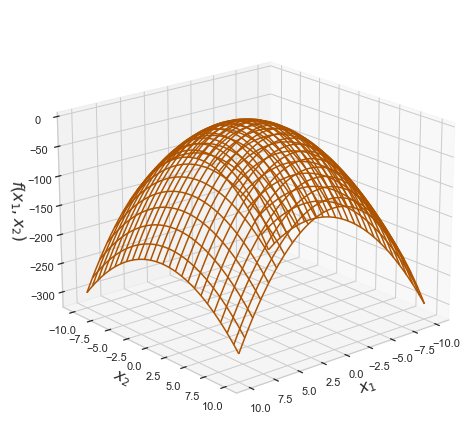

In [9]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

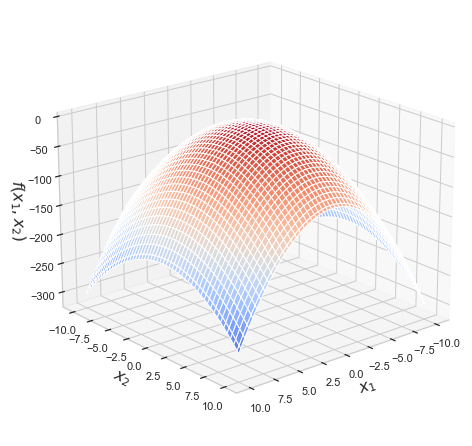

In [10]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

#### Notes
* This is a typical method of Python programming.
* We define a function, func, to which we pass objects.
* We write it to return manipulations of those objects.

In [11]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(-2 * x1**2 - x2**2 + x1 + x2)

minimize(func, [-10.0, -10.0], args=(-1.0,), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10


      fun: -0.37499999999999917
 hess_inv: array([[0.25132329, 0.00137504],
       [0.00137504, 0.50142814]])
      jac: array([9.31322575e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([0.25000002, 0.50000002])

#### Example 2

$f(x_1,x_2)= - \sqrt{x_1^2+x_2^2}$

In [12]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -1.0 * sqrt(x1**2 + x2**2)

Text(0.5, 0, '$f(x_1, x_2)$')

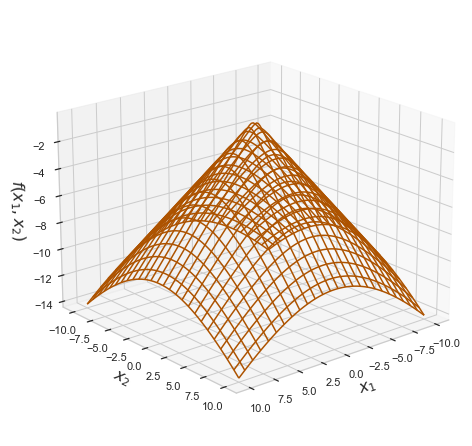

In [13]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

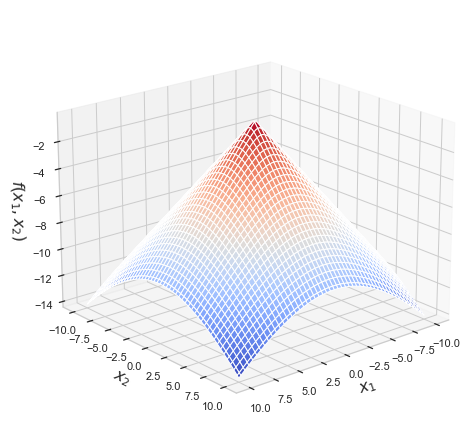

In [14]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [15]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 297
         Gradient evaluations: 95


      fun: 4.7771336629045634e-09
 hess_inv: array([[1.02649054e-08, 4.51063218e-10],
       [4.51063218e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 297
      nit: 11
     njev: 95
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323835e-10])

#### Example 3

$f(x_1,x_2)=x_2^2-x_1^2$

In [16]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = x2**2 - x1**2

Text(0.5, 0, '$f(x_1, x_2)$')

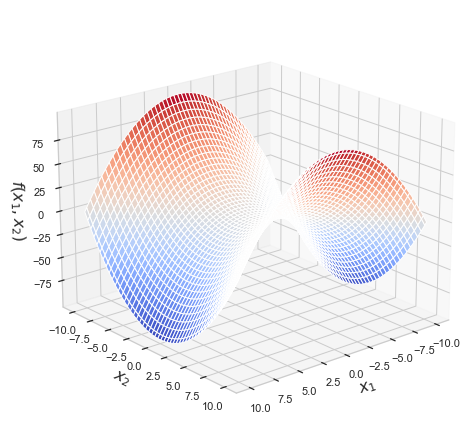

In [17]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

#### Notes

* This is the famous "saddle path" frequently discussed in macroeconomics

In [18]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 297
         Gradient evaluations: 95


      fun: 4.7771336629045634e-09
 hess_inv: array([[1.02649054e-08, 4.51063218e-10],
       [4.51063218e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 297
      nit: 11
     njev: 95
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323835e-10])

#### Notes
* One of the reasons we embed the algorithm in an optimization problem is to create optimal values (rather than guessing).
* CAPM is an example of the unification of finance theory and analytcs that yields precise calculations for $\alpha$ and $\beta$ given the linear representation, $E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f) + \epsilon_i$.
* Moreover, $\alpha$ and $\beta$ have real-world interpretations about the excess returns on an asset (relative to a risk-free return) and the sensitivity of a portfolio returns to market conditions. 

### Key idea for analytics: what is probability and statistics?  
* Classical view arose from gambling with dice and holds that outcomes have equal probabilty.  



* Subjective view uses a model with randomness such as the payoff to a particular gamble.  



* Classical view holds that probability is based on the history of outcomes from an experiment, such as the probability the stock market goes up tomorrow.



* Statistics is the application of probability theory using real-world data.

### Probability and statistics motivated by Geltner *et al.* Exhibits 9-1 and 9-2

## A digression on data types
* **Structured**: a spreadheet and the most common in CRE, making linear models indepensible.



* **Unstructured**: video, making data storage and analysis challenging.  (Deep learning plays a role here.)



* **Semi-structured**: text messages

## An example of data cleaning

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

In [20]:
sales03 = pd.read_excel("sales_si_03.xls", header=3, index_col=None)
sales03.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,7,,A5,4732 AMBOY ROAD,,...,1,0,1,3655,1110,2002,1,A5,365040,2003-03-05
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,8,,A5,4730 AMBOY ROAD,,...,1,0,1,3149,1110,2002,1,A5,353886,2003-01-13
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,12,,A5,4718 AMBOY ROAD,,...,1,0,1,1746,1110,2002,1,A5,310000,2003-07-25
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,13,,A5,4716 AMBOY ROAD,,...,1,0,1,1871,1110,2002,1,A5,299130,2003-09-05
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,15,,A5,4714 AMBOY ROAD,,...,1,0,1,4678,1110,2002,1,A5,304099,2003-09-19


#### Notes
* These data are available on the NYC Open Data Portal: House sales in Staten Island betweeen 2003 and 2007.
* We are going to input using Panda's ability to read Excel files.
* We are going to 'stack' the data because each file has the same format.
* We will then clean the data for use.

In [21]:
sales03 = pd.read_excel("sales_si_03.xls", header=3, index_col=None)
sales04 = pd.read_excel("sales_si_04.xls", header=3, index_col=None)
sales05 = pd.read_excel("sales_si_05.xls", header=3, index_col=None)
sales06 = pd.read_excel("sales_si_06.xls", header=3, index_col=None)
sales = pd.concat([sales03, sales04, sales05, sales06])

In [22]:
sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,7,,A5,4732 AMBOY ROAD,,...,1,0,1,3655,1110,2002,1,A5,365040,2003-03-05
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,8,,A5,4730 AMBOY ROAD,,...,1,0,1,3149,1110,2002,1,A5,353886,2003-01-13
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,12,,A5,4718 AMBOY ROAD,,...,1,0,1,1746,1110,2002,1,A5,310000,2003-07-25
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,13,,A5,4716 AMBOY ROAD,,...,1,0,1,1871,1110,2002,1,A5,299130,2003-09-05
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,15,,A5,4714 AMBOY ROAD,,...,1,0,1,4678,1110,2002,1,A5,304099,2003-09-19


In [23]:
sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,46381.0,46381.000000,46381.000000,46381.000000,46381.000000,46381.000000,46381.000000,4.638100e+04,46381.000000,46381.000000,46381.000000,4.638100e+04
mean,5.0,3221.105496,186.420150,10280.586943,1.327462,0.315172,1.642634,6.192493e+03,2109.868718,1875.196675,1.158556,2.903822e+05
std,0.0,2360.069542,440.855935,527.980830,4.970062,26.020568,26.476876,8.657732e+04,9196.425843,421.952633,0.607804,1.116870e+06
min,5.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.0,1057.000000,24.000000,10304.000000,1.000000,0.000000,1.000000,1.920000e+03,1120.000000,1940.000000,1.000000,0.000000e+00
50%,5.0,2983.000000,53.000000,10307.000000,1.000000,0.000000,1.000000,3.000000e+03,1657.000000,1975.000000,1.000000,2.700000e+05
75%,5.0,5327.000000,124.000000,10312.000000,2.000000,0.000000,2.000000,4.500000e+03,2220.000000,1995.000000,1.000000,4.100000e+05
max,5.0,8050.000000,7502.000000,10314.000000,403.000000,4964.000000,4964.000000,1.080288e+07,881000.000000,2012.000000,4.000000,1.894423e+08


#### Notes
* Let's examine summary statistics of the numeric features: **Know your data**.
* Borough has mean 5.0 and standard deviation 0. Does this make sense?  Yes, because it is Staten Island.
* Block and Lot have a minimum value of 1, which is odd, as is Zip Code of 0.
* Some houses have 0 residential units, which is also odd.
* 0 square footage (or 0 square meters) is also odd.
* Lots of zero price sales.

In [24]:
sales = sales[sales['RESIDENTIAL UNITS'] == 1]

sales = sales[sales['COMMERCIAL UNITS'] == 0]

sales = sales[sales['YEAR BUILT'] <= 2006]

sales = sales[sales['LAND SQUARE FEET'] > 0]
sales = sales[sales['GROSS SQUARE FEET'] > 0]
sales = sales[sales['LAND SQUARE FEET'] <= 6000]
sales = sales[sales['GROSS SQUARE FEET'] <= 4000]

sales = sales[sales['TAX CLASS AT TIME OF SALE'] == 1]

sales = sales[sales['SALE PRICE'] >= 1000]
sales = sales[sales['SALE PRICE'] <= 6000000]

#### Notes
* Note the syntax of these commands
* == limits the dataframe to those observations that resolve as **True**.
* $\le$ does the same thing.
* $\gt$ does the same thing.
* Deconstruct logical statements and the syntax.
* Are these restrictions resonable?

In [25]:
sales = sales[['NEIGHBORHOOD', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE']]
sales = sales.rename(columns={"NEIGHBORHOOD": "nb", "LAND SQUARE FEET": "lsf",
                    "GROSS SQUARE FEET": "gsf", "YEAR BUILT": "year", 
                     "SALE PRICE": "price", "SALE DATE": 'date'})

#### Notes
* Often we only need a subset of the data and want to rename columns.
* First line of code restricts the dataframe.
* Second renames the features we wish to use.

In [26]:
sales.describe()

,lsf,gsf,year,price
count,16633.000000,16633.000000,16633.000000,1.663300e+04
mean,2730.830698,1600.299044,1973.760777,3.541230e+05
std,1313.081728,545.022600,30.117280,1.549677e+05
min,262.000000,260.000000,1890.000000,1.000000e+03
25%,1800.000000,1218.000000,1955.000000,2.700000e+05
50%,2500.000000,1524.000000,1986.000000,3.484860e+05
75%,3795.000000,1900.000000,1999.000000,4.240000e+05
max,6000.000000,4000.000000,2006.000000,5.075000e+06


In [27]:
sales.corr()

,lsf,gsf,year,price
lsf,1.000000,0.249074,-0.452631,0.350953
gsf,0.249074,1.000000,0.292993,0.378358
year,-0.452631,0.292993,1.000000,0.092346
price,0.350953,0.378358,0.092346,1.000000


Text(0, 0.5, 'Million ($)')

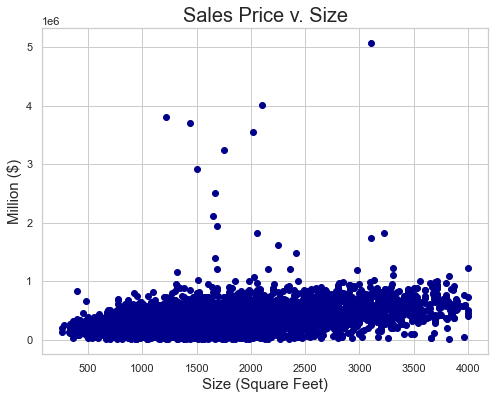

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(sales['gsf'], sales['price'], c='darkblue')
plt.title('Sales Price v. Size', fontsize=20)
plt.xlabel('Size (Square Feet)', fontsize=15)
plt.ylabel('Million ($)', fontsize=15)

### Next week you will explore how linear regression, an algorithm, can assist us to explore this relationship